## Project- Healthcare 
**Problem Statement:**
* `NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases)` research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
* The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
* Build a model to accurately predict whether the patients in the dataset have diabetes or not.

I worked on this capstone project towards completion of final assessment for Data Science BootCamp from OdinSchool. 

My job was to analyze the datasets from NIDDK consisting of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more. I created and trained a number of Machine Learning models using various classification algorithms for prediction of diabetes in patients. 

**Tasks Performed:**
* `Data Cleaning`
* `Data Transformation`
* `Exploratory data analysis` : EDA is one of the most important step in data science project life cycle to inferences from the visualizations and data analysis.
* `Data Modeling` - various classification models
* `Data Modeling` - performance evaluation using various metrics

**Variables - Description**

* Pregnancies - Number of times pregnant
* Glucose - Plasma glucose concentration in an oral glucose tolerance test
* BloodPressure - Diastolic blood pressure (mm Hg)
* SkinThickness - Triceps skinfold thickness (mm)
* Insulin - Two hour serum insulin
* BMI - Body Mass Index
* DiabetesPedigreeFunction - Diabetes pedigree function
* Age - Age in years
* Outcome - Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

Tabluea Public Link for Diabetes Prediction Vizualization & Dashboard :
https://public.tableau.com/app/profile/nipun.gupta3604/viz/DiabetesAnalysisDashboard_16602222811040/Dashboard1#1


### Data Exploration:
**Read Data and Perform descriptive analysis:**

In [64]:
# Importing Libraries
import pandas as pd
import numpy as np
import missingno as msno
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from fancyimpute import KNN
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

###  Importing the dataset 

In [65]:
diab = pd.read_csv('health care diabetes.csv')
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
diab.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Exploratory Data Analysis (EDA)

In [67]:
# checking no. of rows and columns
diab.shape

(768, 9)

In [68]:
# Now let' see that what are the columns available in our dataset.
diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [69]:
# Information about the dataset
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###  Descriptive analysis:
Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value.

In [70]:
diab[diab['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [71]:
# Statistical Summary
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [72]:
# To know more about the dataset with transpose - here T is for the transpose 
diab.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [73]:
# Now let's check that if our dataset have null values or not
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here from above code we first checked that is there any null values from isnull() function then we are going to take the sum of all those missing values from sum() function and the inference we now get is that there are no missing values but that is actually not a true story as in this particular dataset all the missing values were given the 0 as value which is not good for the authenticity of the dataset. Hence we will first replace the 0 value to NAN value then start the imputation process.

In [74]:
# Lets create a list of features whose values can't be zero
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [75]:
# Printing number of Zero values in these columns
for col in cols:
        print(f'No of zeroes in {col} : {diab[diab[col]==0].value_counts().sum()}')

No of zeroes in Glucose : 5
No of zeroes in BloodPressure : 35
No of zeroes in SkinThickness : 227
No of zeroes in Insulin : 374
No of zeroes in BMI : 11


In [76]:
#Replacing 0 with nan values
diab[cols] = diab[cols].replace([0], np.nan)

In [77]:
# Again Checking for Zero Values
for col in cols:
        print(f'No of zeroes in {col} : {diab[diab[col]==0].value_counts().sum()}')

No of zeroes in Glucose : 0
No of zeroes in BloodPressure : 0
No of zeroes in SkinThickness : 0
No of zeroes in Insulin : 0
No of zeroes in BMI : 0


In [78]:
# Showing the Count of missing values
for col in cols:
        print(f'No of missing values in {col} : {diab[col].isnull().sum()}')

No of missing values in Glucose : 5
No of missing values in BloodPressure : 35
No of missing values in SkinThickness : 227
No of missing values in Insulin : 374
No of missing values in BMI : 11


In [79]:
# Percentage of missing values in the dataset
diab.isnull().mean()*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [80]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Visually explore these variables using histograms. Treat the missing values accordingly.

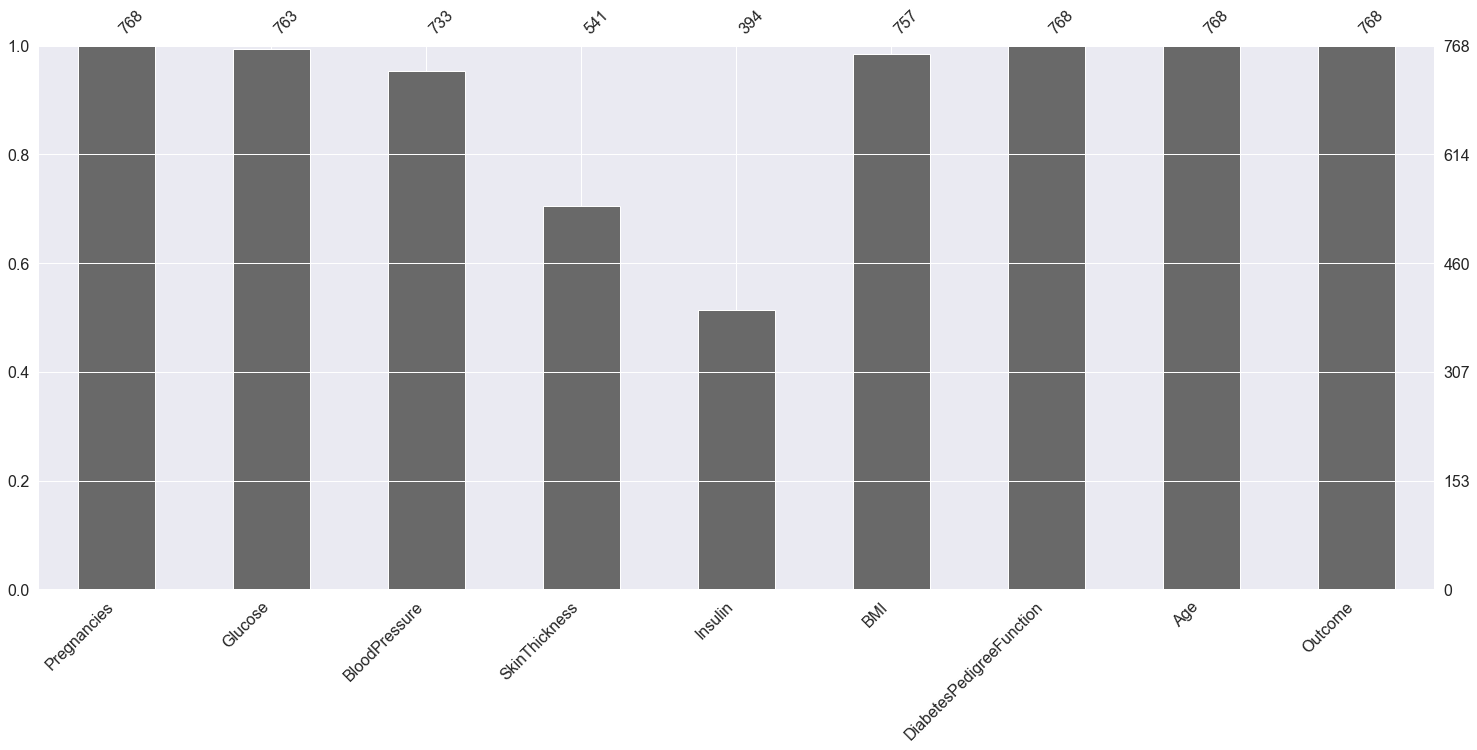

In [81]:
# Vizualize missing values
msno.bar(diab);

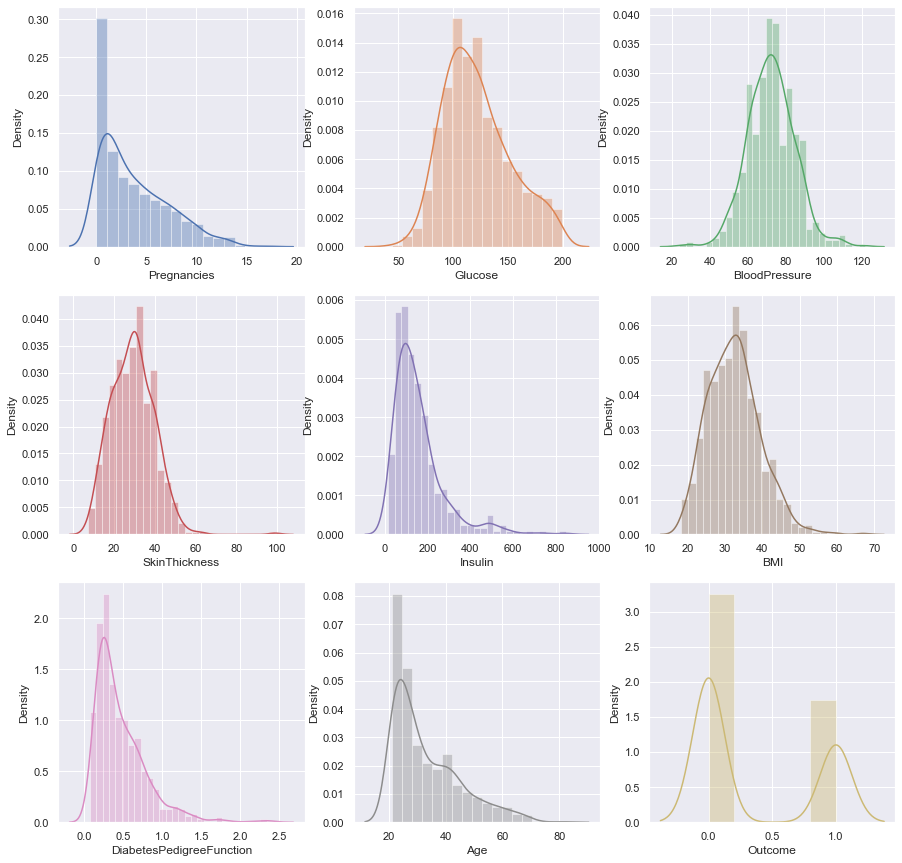

In [82]:
# Define the number of rows and columns you want
sns.set(rc = {'figure.figsize':(15,15)})
n_rows=3
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

for i, column in enumerate(diab.columns):
    sns.distplot(diab[column],ax=axes[i//n_cols,i%n_cols],color = next(color_cycle))

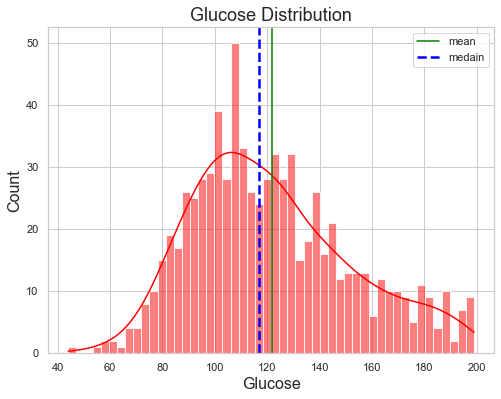

In [83]:
sns.set(rc={'figure.figsize':(8,6)})
sns.set_theme(style="whitegrid")
sns.histplot(diab['Glucose'], kde=True, color='red', bins=50)
plt.title('Glucose Distribution', fontsize=18)
plt.xlabel('Glucose', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.axvline(x=diab.Glucose.mean(),color='green',label='mean')
plt.axvline(x=diab.Glucose.median(),color='blue',ls='--',lw=2.5,label='medain')
plt.legend();

From the ablove plots it is clear that most of the variables are having skewed distribution and thus mean can'not be used for missing values imputation. Now we can use median or advanced imputation techniques such as KNN Imputer.

Here I have decided to impute missing values from KNN imputation.

### Now we will normalise the data so that we can impute them without bias as the result can be biased if we dont normalise the data.

* We will use standard scaler for normalising the data

In [84]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [85]:
col = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
diab_knn = diab.copy(deep=True)         #creating a copy of the original dataset
SS.fit(diab_knn[col])                   #fitting the model 
diab_knn[col] = SS.transform(diab_knn[col])
diab_knn.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.862287,-0.032746,0.558557,NaN,0.165097,0.468492,1.425995,1
1,-0.844885,-1.202229,-0.517645,-0.014657,NaN,-0.846404,-0.365061,-0.190672,0
2,1.233880,2.009241,-0.679278,NaN,NaN,-1.323254,0.604397,-0.105584,1
3,-0.844885,-1.071148,-0.517645,-0.587871,-0.518847,-0.629654,-0.920763,-1.041549,0
4,-1.141852,0.501816,-2.618874,0.558557,0.104968,1.537847,5.484909,-0.020496,1


In [86]:
# Missing Value Imputation 
from fancyimpute import KNN
knn_imputer = KNN()
diab_knn.iloc[:,:]=knn_imputer.fit_transform(diab_knn)

Imputing row 1/768 with 1 missing, elapsed time: 0.127
Imputing row 101/768 with 2 missing, elapsed time: 0.131
Imputing row 201/768 with 1 missing, elapsed time: 0.134
Imputing row 301/768 with 3 missing, elapsed time: 0.137
Imputing row 401/768 with 2 missing, elapsed time: 0.140
Imputing row 501/768 with 0 missing, elapsed time: 0.143
Imputing row 601/768 with 1 missing, elapsed time: 0.146
Imputing row 701/768 with 0 missing, elapsed time: 0.149


In [87]:
# Checking for null values again
diab_knn.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [88]:
diab_knn.shape

(768, 9)

In [89]:
diab_knn.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.862287,-0.032746,0.558557,0.787173,0.165097,0.468492,1.425995,1.0
1,-0.844885,-1.202229,-0.517645,-0.014657,-0.787636,-0.846404,-0.365061,-0.190672,0.0
2,1.233880,2.009241,-0.679278,0.112475,0.327191,-1.323254,0.604397,-0.105584,1.0
3,-0.844885,-1.071148,-0.517645,-0.587871,-0.518847,-0.629654,-0.920763,-1.041549,0.0
4,-1.141852,0.501816,-2.618874,0.558557,0.104968,1.537847,5.484909,-0.020496,1.0


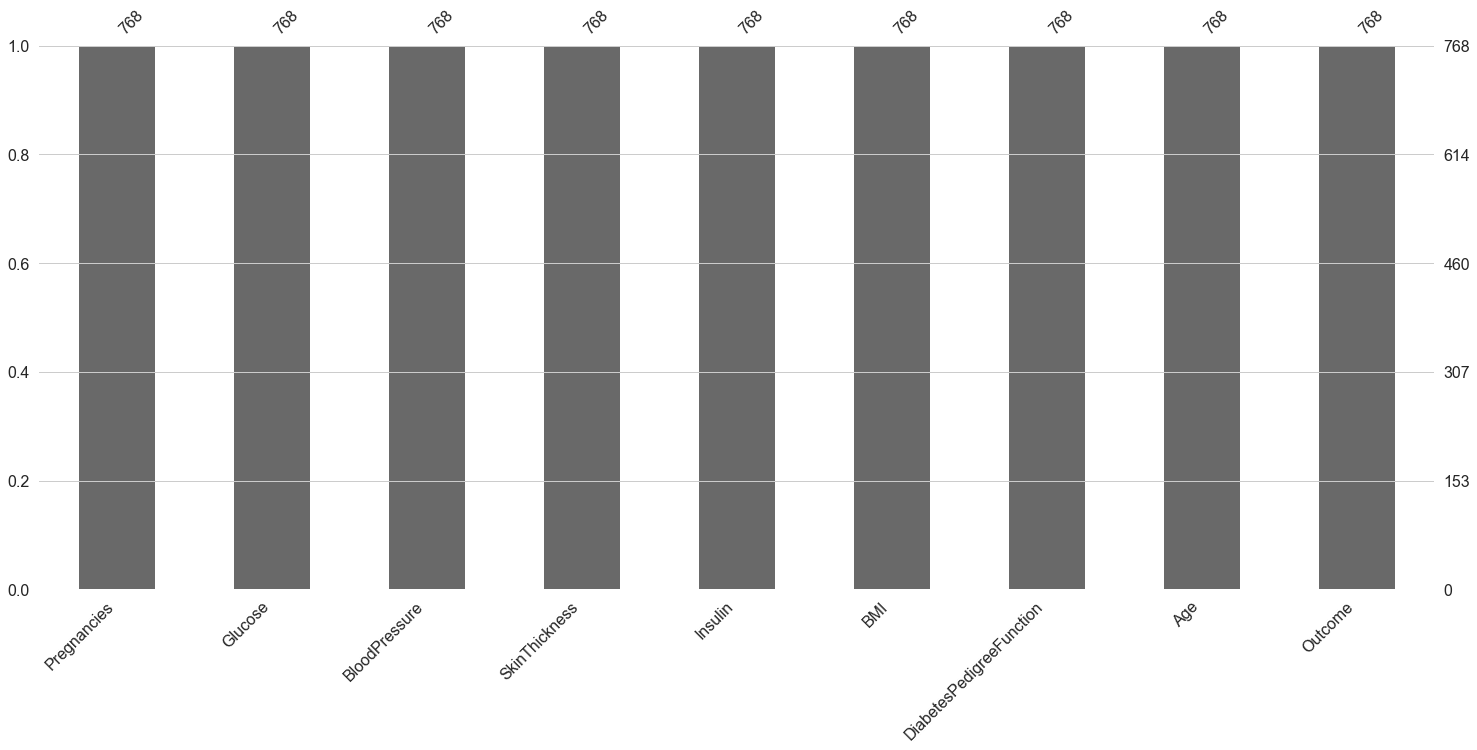

In [90]:
msno.bar(diab_knn);

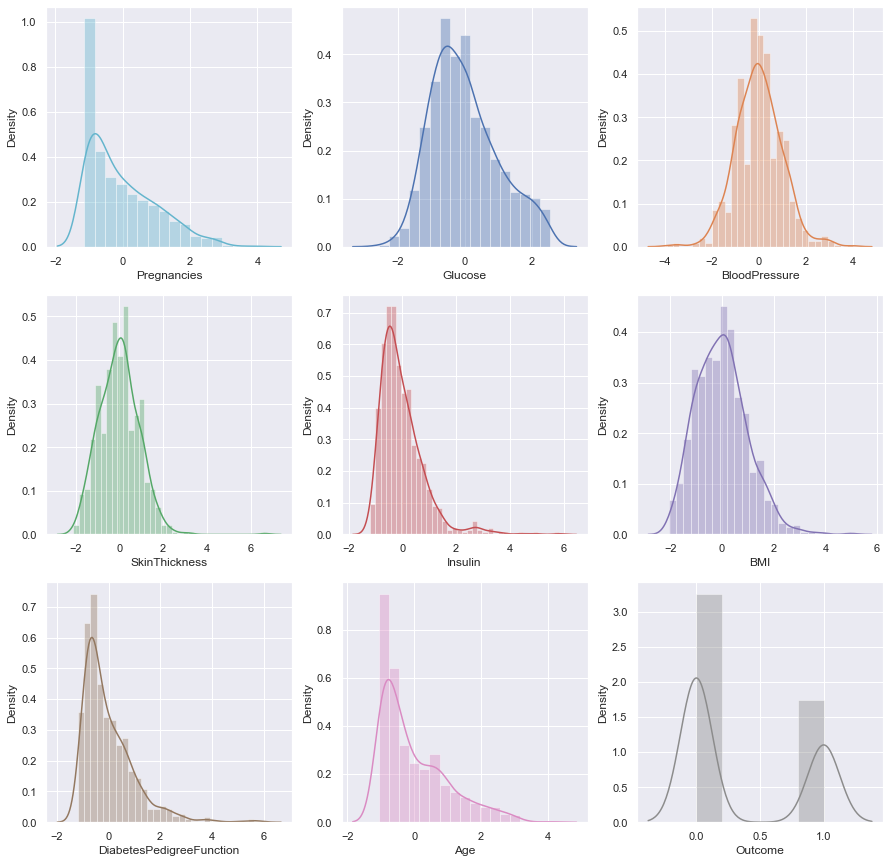

In [91]:
# Define the number of rows and columns you want
sns.set(rc = {'figure.figsize':(15,15)})
n_rows=3
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

for i, column in enumerate(diab_knn.columns):
    sns.distplot(diab_knn[column],ax=axes[i//n_cols,i%n_cols],color = next(color_cycle))

### There are integer and float data type variables in this dataset. 

Creating a count (frequency) plot describing the data types and the count of variables.

In [92]:
diab_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


Here we can see after imputation all the variables are converted to float data type. Again changing the datatype to intial datatype

In [93]:
intcol = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Age','Outcome']
diab_knn[intcol] = diab_knn[intcol].astype(int)
diab_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


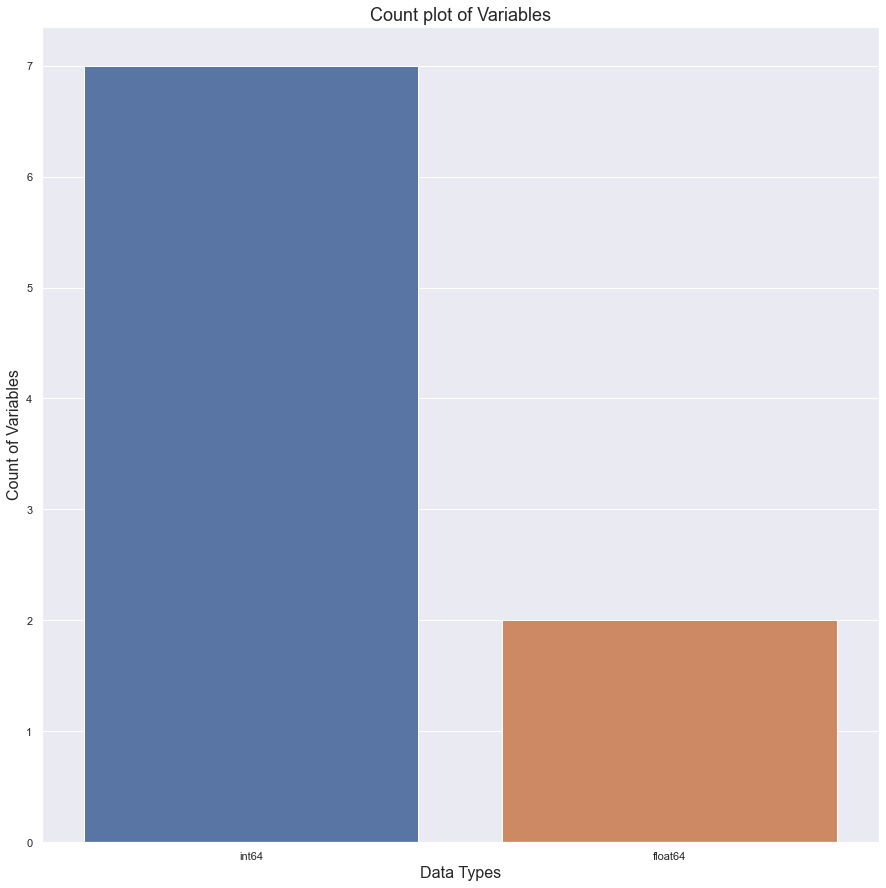

In [94]:
sns.countplot(diab_knn.dtypes.map(str))
plt.title('Count plot of Variables', fontsize=18)
plt.xlabel('Data Types', fontsize=16)
plt.ylabel('Count of Variables', fontsize=16)
plt.show()

### Data Exploration:

### Checking the balance of the data by plotting the count of outcomes by their value.

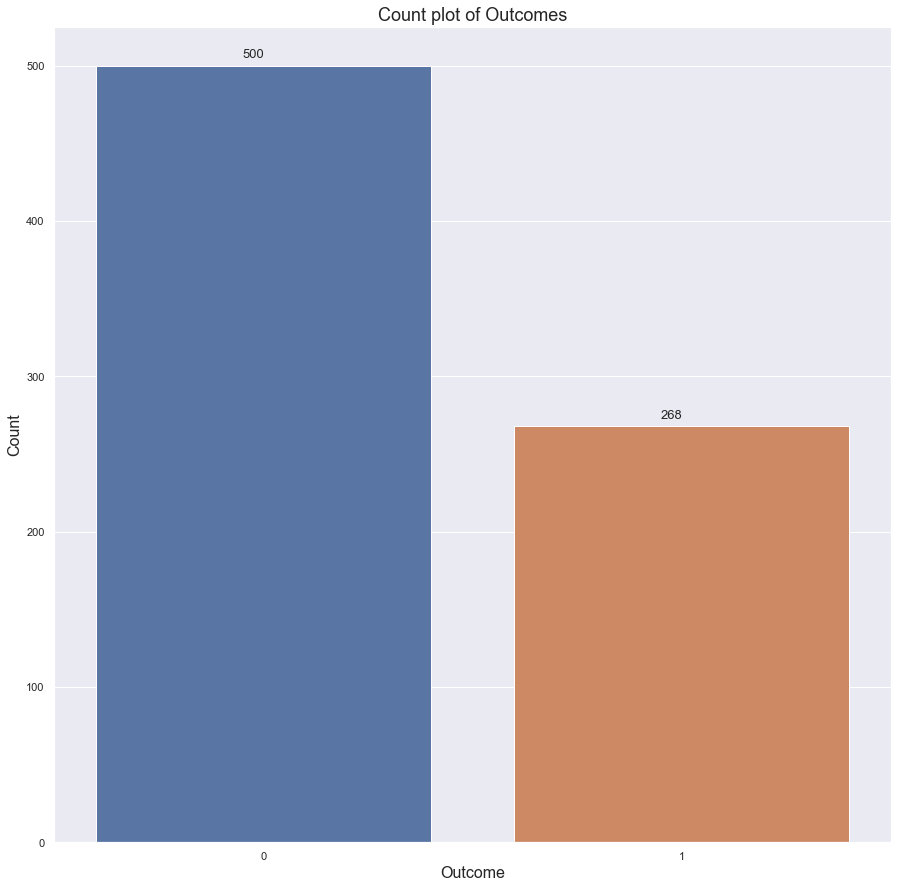

In [95]:
ax =sns.countplot(diab_knn['Outcome'])
plt.title('Count plot of Outcomes', fontsize=18)
plt.xlabel('Outcome', fontsize=16)
plt.ylabel('Count', fontsize=16)
for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+5), fontsize=13)
plt.show()

**Inference** : Here from the above visualization it is clearly visible that our dataset is completely imbalanced infact the number of patient who is diabetic is half of the patients who are non-diabetic

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.
Main problem with imbalanced dataset prediction is how accurately are we actually predicting both majority and minority class

Since classes in Outcome is little skewed so we will generate new samples using SMOTE (Synthetic Minority Oversampling Technique) for the class '1' which is under-represented in our data. 

We will use SMOTE out of many other techniques available since:

* It generates new samples by interpolation.
* It doesn't duplicate data.

In [96]:
df_X = diab_knn.drop('Outcome', axis=1)
df_y = diab_knn['Outcome']
print(df_X.shape, df_y.shape)

(768, 8) (768,)


In [97]:
from imblearn.over_sampling import SMOTE

In [98]:
df_X_resampled, df_y_resampled = SMOTE(random_state=108).fit_resample(df_X, df_y)
print(df_X_resampled.shape, df_y_resampled.shape)

(1000, 8) (1000,)


0    500
1    500
Name: Outcome, dtype: int64

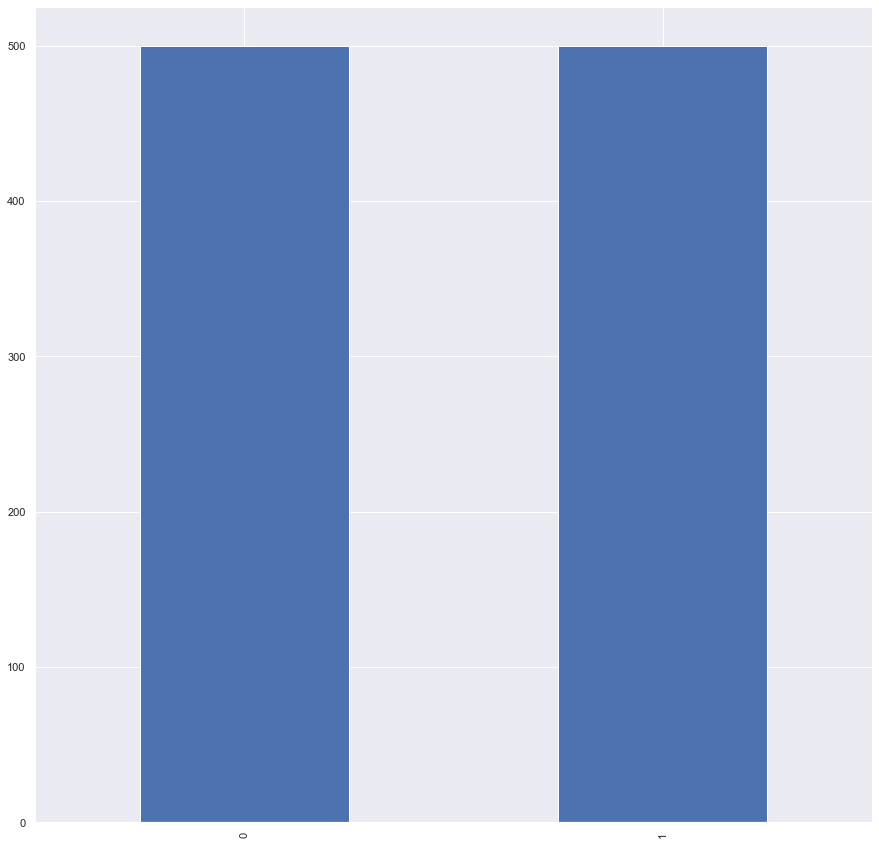

In [99]:
df_y_resampled.value_counts().plot(kind='bar')
df_y_resampled.value_counts()

In [100]:
df_resampled = pd.concat([df_X_resampled, df_y_resampled], axis=1)
df_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,0,0,0,0,0.165097,0.468492,1,1
1,0,-1,0,0,0,-0.846404,-0.365061,0,0
2,1,2,0,0,0,-1.323254,0.604397,0,1
3,0,-1,0,0,0,-0.629654,-0.920763,-1,0
4,-1,0,-2,0,0,1.537847,5.484909,0,1
...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0.953521,1.813774,0,1
996,-1,0,0,0,0,1.096662,-0.282591,0,1
997,1,0,0,0,0,2.074394,0.211208,0,1
998,0,0,0,0,0,-0.730114,-0.689366,0,1


### Creating scatter charts between the pair of variables to understand the relationships.

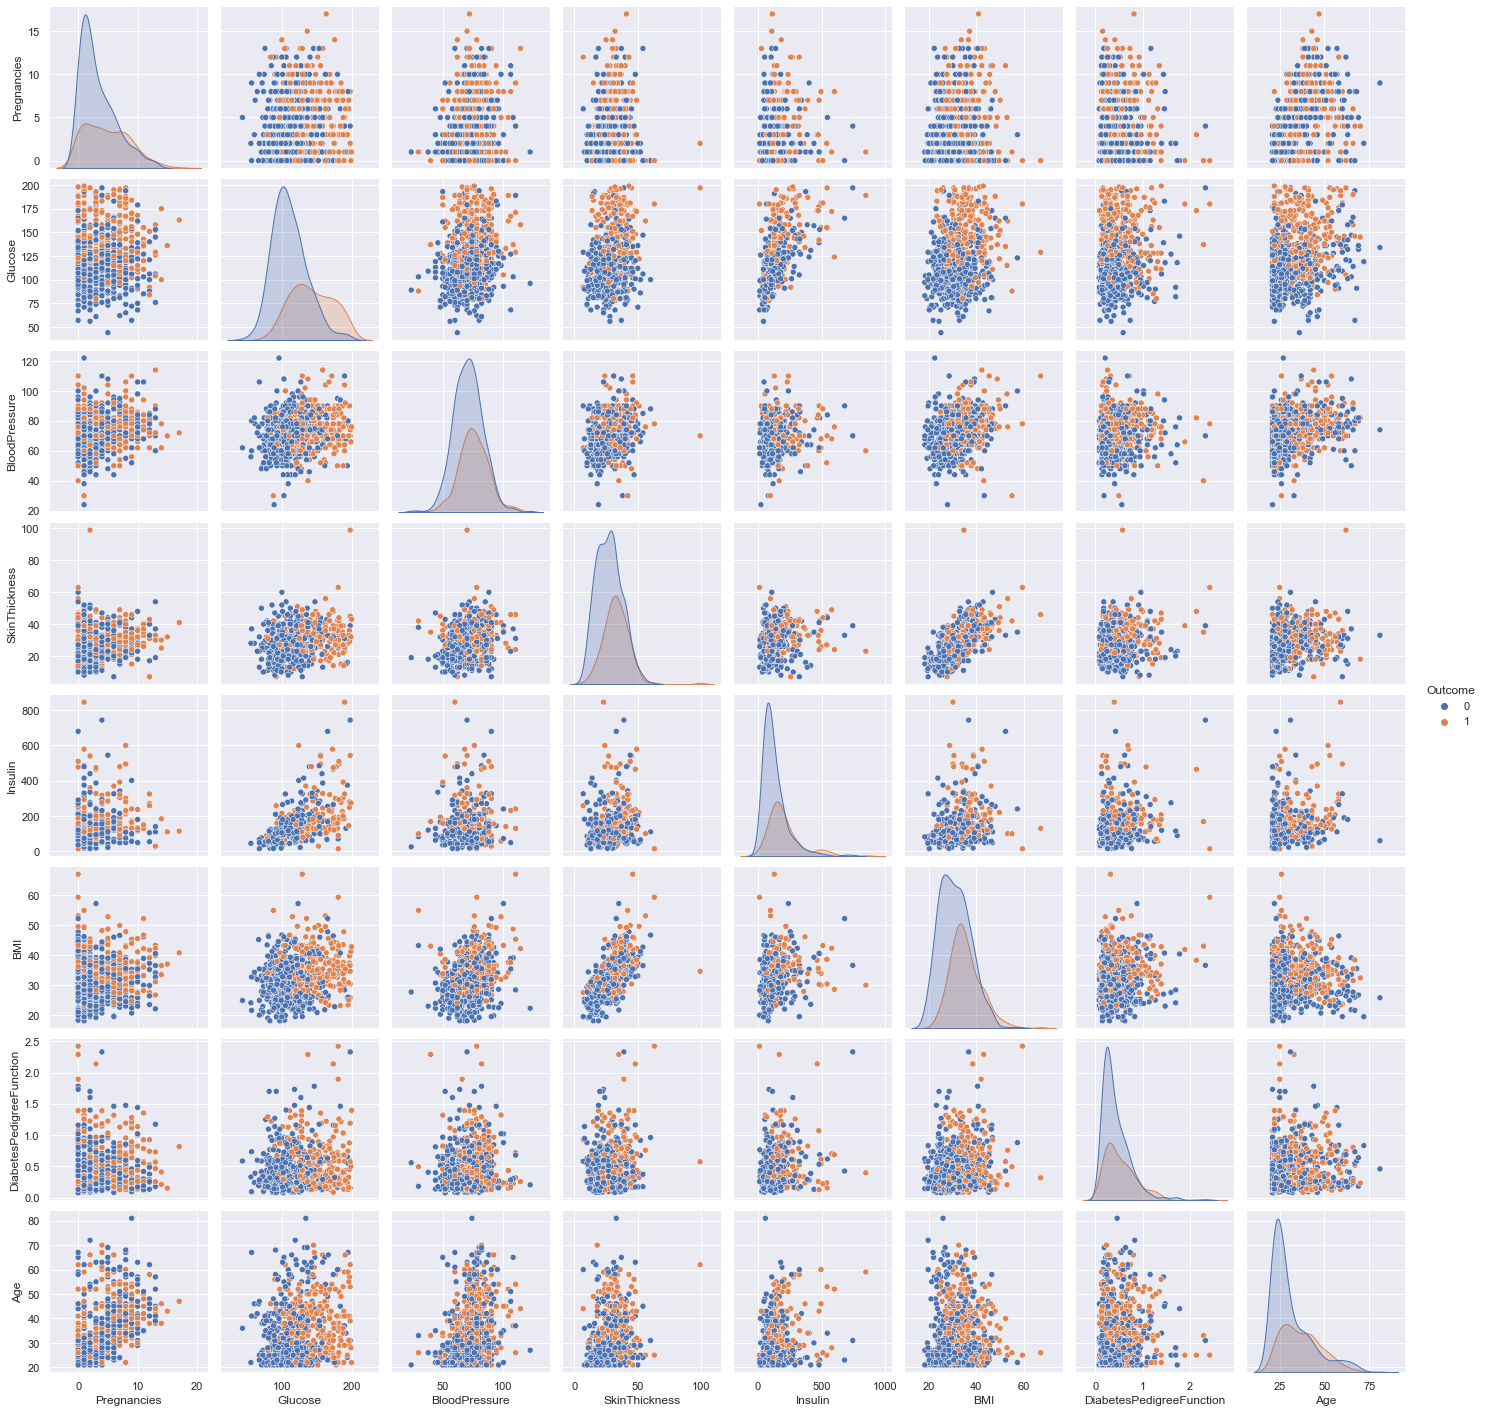

In [101]:
sns.pairplot(diab, hue='Outcome');

We have some interesting observations from above scatter plot of pairs of features:

* Glucose alone is impressively good to distinguish between the Outcome classes.
* Age alone is also able to distinguish between classes to some extent.
* It seems none of pairs in the dataset is able to clealry distinguish between the Outcome classes.
* We need to use combination of features to build model for prediction of classes in Outcome.

### 3. Perform correlation analysis. Visually explore it using a heat map.

In [102]:
df_X_resampled.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.020507,0.068978,0.013484,-0.021342,-0.023383,-0.013298,0.270810
Glucose,0.020507,1.000000,0.155204,0.079877,0.312123,0.164527,0.112570,0.143825
BloodPressure,0.068978,0.155204,1.000000,0.133367,-0.001801,0.263927,-0.010905,0.147958
SkinThickness,0.013484,0.079877,0.133367,1.000000,0.089441,0.536612,0.104894,0.064021
Insulin,-0.021342,0.312123,-0.001801,0.089441,1.000000,0.099155,0.089165,0.101941
BMI,-0.023383,0.164527,0.263927,0.536612,0.099155,1.000000,0.142065,-0.023178
DiabetesPedigreeFunction,-0.013298,0.112570,-0.010905,0.104894,0.089165,0.142065,1.000000,0.019234
Age,0.270810,0.143825,0.147958,0.064021,0.101941,-0.023178,0.019234,1.000000


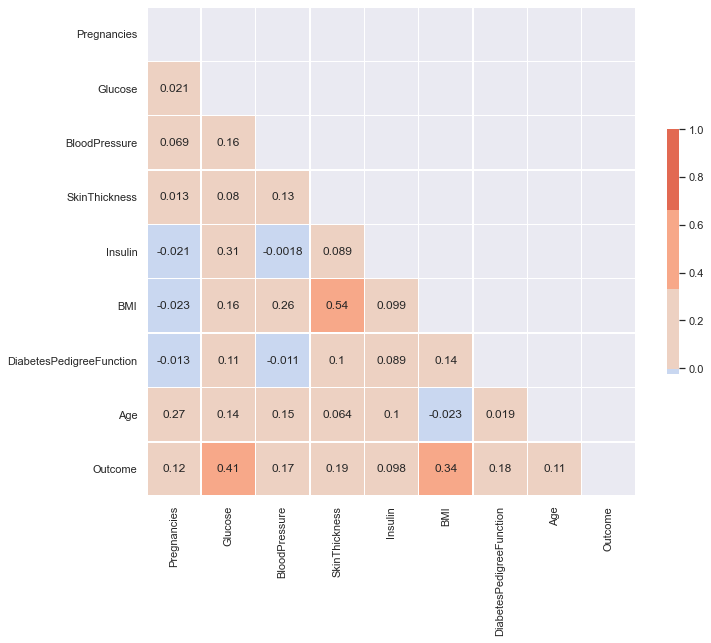

In [103]:
corr = df_resampled.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap=sns.color_palette('coolwarm'), vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True);

It appears from correlation matrix and heatmap that there exists significant correlation between some pairs such as -

* BMI-SkinThickness


### Model Building:

## Devise strategies for model building. It is important to decide the right validation framework.
- We will apply the **Classification algorithms** as the outcome is a categorical variable.
- We will start with the **Logistic Regression** and compare its performance with other algorithms.
- The algorothm with the best **True Positive Rate** (Recall) and performance meterics will be preferred.
- We will use- Logistic Regression, Decision Tree, Random Forest and SVM.


### First we will check the most important feature using RandomForest Clasifier

In [104]:
# Train-Test Split
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(df_X_resampled, df_y_resampled, 
                                                    test_size=0.15, random_state =10)

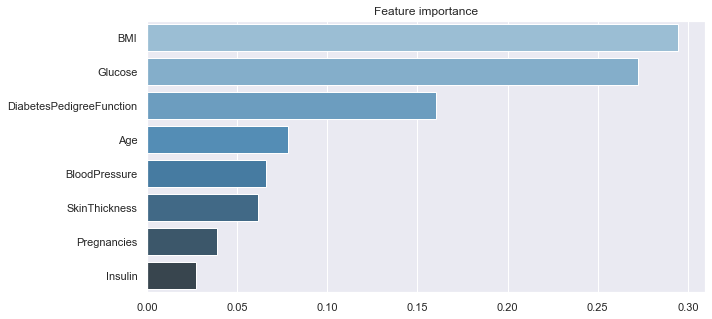

In [105]:
from sklearn.ensemble import RandomForestClassifier
params={'random_state':0,'n_jobs':-1,'n_estimators':500,'max_depth':8}

clf = RandomForestClassifier(**params)
clf = clf.fit(df_X_resampled, df_y_resampled)

# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=df_X_resampled.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

### As we can see, Glucose and BMI are the most important feature, so we will look at them more closely.

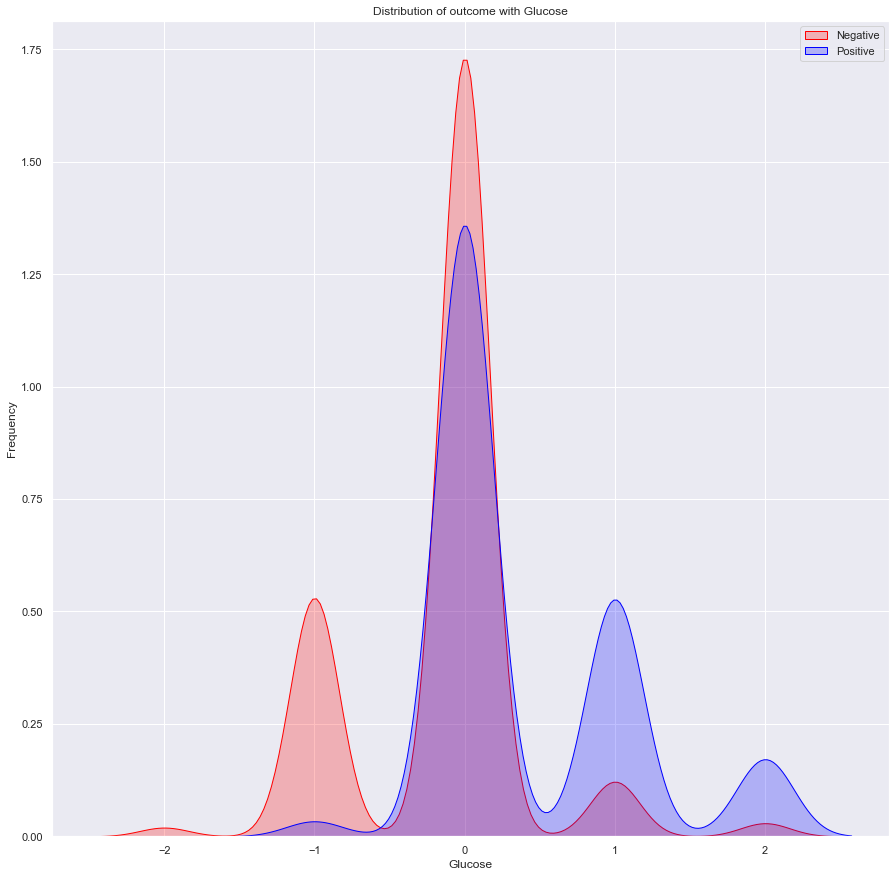

In [106]:
g = sns.kdeplot(df_resampled.Glucose[(df_resampled["Outcome"] == 0) ], color="Red", shade = True)
g = sns.kdeplot(df_resampled.Glucose[(df_resampled["Outcome"] == 1) ], ax =g, color="Blue", shade= True)

g.set_xlabel("Glucose")
g.set_ylabel("Frequency")

plt.title('Distribution of outcome with Glucose')

g = g.legend(["Negative","Positive"])

This graph clearly shows us that, the higher the Glucose value, the more chances are of the person to be diabetic.

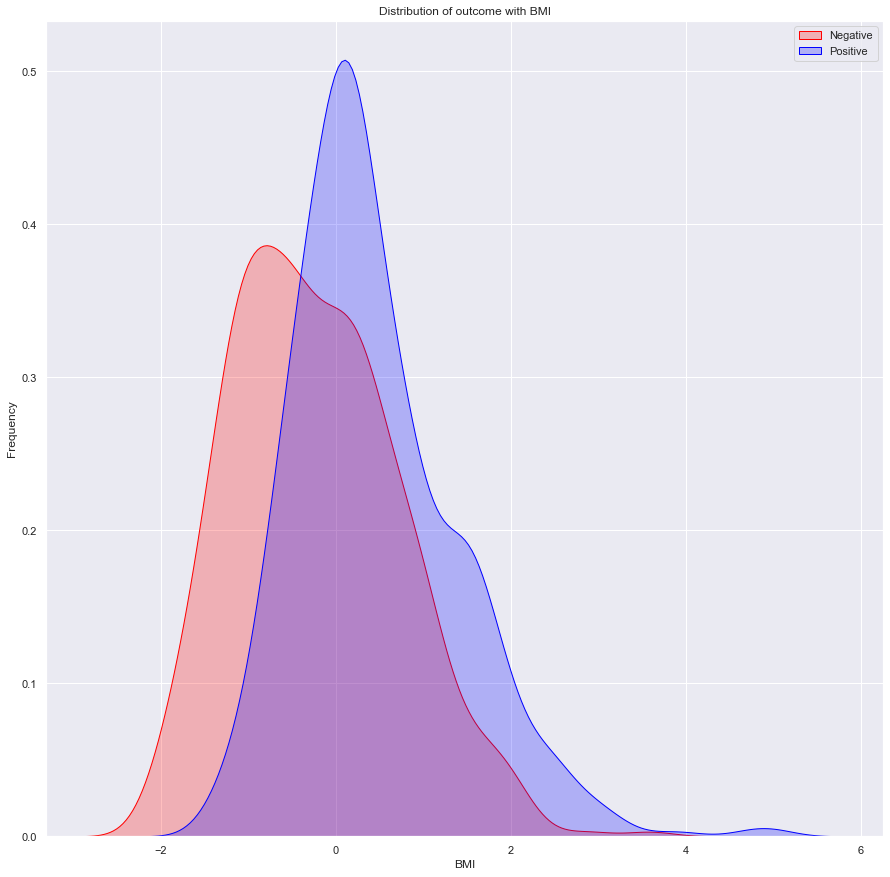

In [107]:
g = sns.kdeplot(df_resampled.BMI[(df_resampled["Outcome"] == 0) ], color="Red", shade = True)
g = sns.kdeplot(df_resampled.BMI[(df_resampled["Outcome"] == 1) ], ax =g, color="Blue", shade= True)

g.set_xlabel("BMI")
g.set_ylabel("Frequency")

plt.title('Distribution of outcome with BMI')

g = g.legend(["Negative","Positive"])

This graph clearly shows that higher the BMI, higher are the chances are of a positive result

In [189]:
# We will Save all the accuracy matrices in a seperate dataset to visualise it later for comparison.
models = []
model_accuracy = []
model_f1 = []
model_auc = []

In [109]:
## Importing accuracy meterics
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, auc, roc_curve, roc_auc_score, precision_recall_curve

### Builidng the model using Logistic Regression

In [192]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [193]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [194]:
lr.score(xtrain,ytrain)    #accuracy score on training Data

0.72

In [195]:
lr.score(xtest,ytest)      #accuracy score on test data

0.7533333333333333

### ROC curve

AUC: 0.857


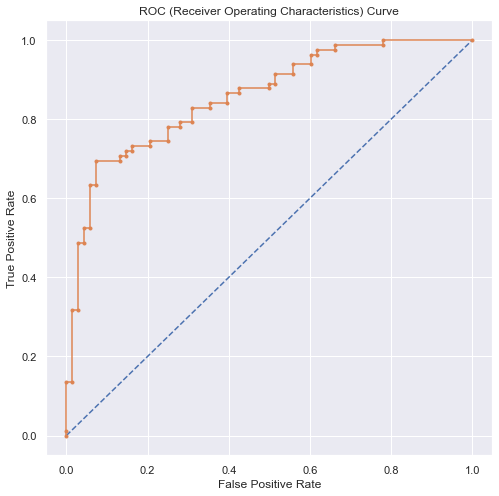

In [196]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
plt.figure(figsize=(8,8))
probs = lr.predict_proba(xtest)                  # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_lr = roc_auc_score(ytest, probs)             # calculate AUC
print('AUC: %.3f' %auc_lr)
fpr, tpr, thresholds = roc_curve(ytest, probs)   # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

### Precision Recall curve

f1=0.767 auc_pr=0.882 ap=0.883


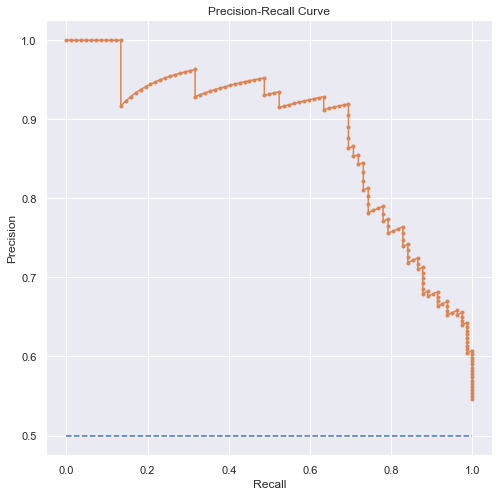

In [197]:
# Precision Recall Curve 
plt.figure(figsize=(8,8))
pred_ytest_lr = lr.predict(xtest)                                        # predict class values
precision, recall, thresholds = precision_recall_curve(ytest, probs)  # calculate precision-recall curve
f1 = f1_score(ytest, pred_ytest_lr)                                      # calculate F1 score
auc_lr_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(ytest, probs)                            # calculate average precision score
print("f1=%.3f auc_pr=%.3f ap=%.3f" % (f1, auc_lr_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

Adding the values in the dataset prepared above for comparison¶

In [198]:
models.append('LR')
model_accuracy.append(accuracy_score(ytest, pred_ytest_lr))
model_f1.append(f1)
model_auc.append(auc_lr)

## Decision Tree

In [199]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state = 0)

In [200]:
DTC.fit(xtrain,ytrain)  #accuracy score on training data

DecisionTreeClassifier(random_state=0)

In [201]:
DTC.score(xtrain,ytrain)  #accuracy score on training data

1.0

In [202]:
DTC.score(xtest,ytest)  #accuracy on test data

0.7666666666666667

#### Now we will use GridSearchCv to optimise the performance of Decision Tree

In [203]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [204]:
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10,None]}

In [205]:
GridDTC = GridSearchCV(DTC, param_grid = parameters, cv=5, verbose=0)
GridDTC.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]})

In [206]:
print('Best Parameters : ',GridDTC.best_params_)
print('Best Accuracy Score : ',GridDTC.best_score_)

Best Parameters :  {'max_depth': 4}
Best Accuracy Score :  0.717


In [207]:
BestDTC = DecisionTreeClassifier(max_depth=4)

In [208]:
BestDTC.fit(xtrain,ytrain)
print("Accuracy Score for Training Dataset : ",BestDTC.score(xtrain,ytrain))
print("Accuracy Score for test Dataset : ",BestDTC.score(xtest,ytest))

Accuracy Score for Training Dataset :  0.7529411764705882
Accuracy Score for test Dataset :  0.74


AUC: 0.795


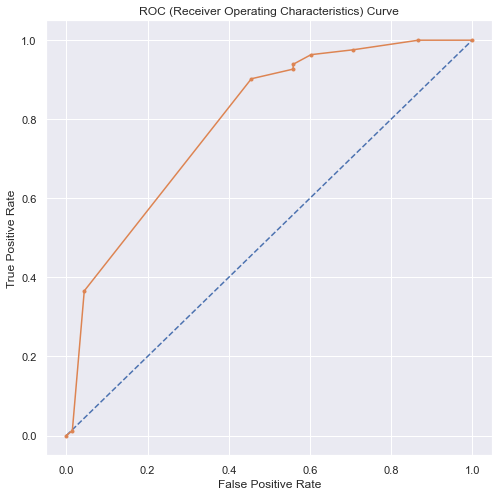

In [209]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
plt.figure(figsize=(8,8))
probs = BestDTC.predict_proba(xtest)                 # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_dt = roc_auc_score(ytest, probs)             # calculate AUC
print('AUC: %.3f' %auc_dt)
fpr, tpr, thresholds = roc_curve(ytest, probs)   # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.791 auc_pr=0.755 ap=0.768


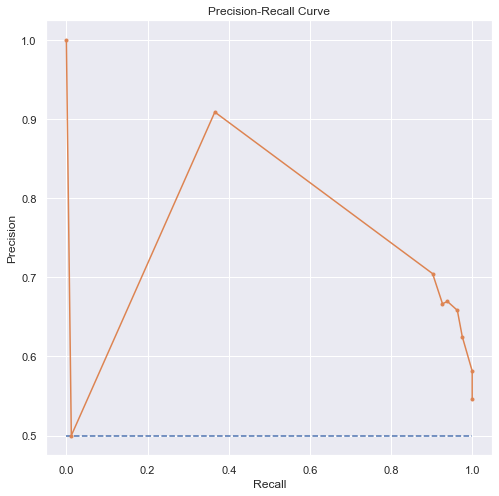

In [210]:
# Precision Recall Curve 
plt.figure(figsize=(8,8))
pred_ytest_dt = BestDTC.predict(xtest)                                   # predict class values
precision, recall, thresholds = precision_recall_curve(ytest, probs)  # calculate precision-recall curve
f1 = f1_score(ytest, pred_ytest_dt)                                      # calculate F1 score
auc_dt_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(ytest, probs)                            # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_dt_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [211]:
models.append('Decision Tree')
model_accuracy.append(accuracy_score(ytest, pred_ytest_dt))
model_f1.append(f1)
model_auc.append(auc_dt)

### Random Forest Classifier

In [212]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state = 0)

In [213]:
RFC.fit(xtrain,ytrain)

RandomForestClassifier(random_state=0)

In [214]:
RFC.score(xtrain,ytrain)      #accuracy Score for training dataset

1.0

In [215]:
RFC.score(xtest,ytest)        #accuracy score for test dataset

0.7733333333333333

#### Now we will use the GridSearchCV to maximise the performance of Random Forest Classifier

In [216]:
parameters = {
    'n_estimators': [5,10,25,50,100,150,200,250],
    'max_depth': [None,1,3,5,7,10,15,20],
    'min_samples_leaf': [1,3,5]
}

In [217]:
GridRFC = GridSearchCV(estimator=RFC, param_grid=parameters, cv=5, verbose=0)
GridRFC.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 1, 3, 5, 7, 10, 15, 20],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [5, 10, 25, 50, 100, 150, 200, 250]})

In [218]:
print('Best Parameters : ',GridRFC.best_params_)
print('Best Accuracy Score : ',GridRFC.best_score_)

Best Parameters :  {'max_depth': 20, 'min_samples_leaf': 3, 'n_estimators': 250}
Best Accuracy Score :  0.782


In [219]:
BestRFC = RandomForestClassifier(max_depth=20, min_samples_leaf=3, n_estimators=250)

In [220]:
BestRFC.fit(xtrain,ytrain)
print("Accuracy Score for Training Dataset : ",BestRFC.score(xtrain,ytrain))
print("Accuracy Score for test Dataset : ",BestRFC.score(xtest,ytest))

Accuracy Score for Training Dataset :  0.8647058823529412
Accuracy Score for test Dataset :  0.82


AUC: 0.795


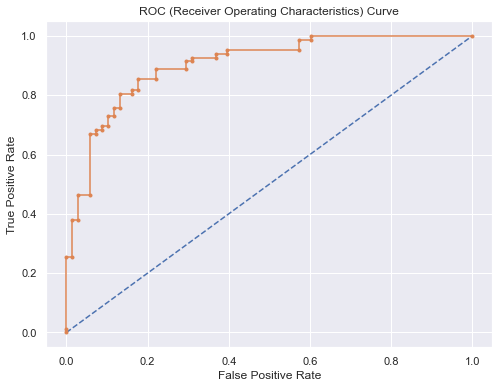

In [221]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
plt.figure(figsize=(8, 6))
probs = BestRFC.predict_proba(xtest)                 # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_rf = roc_auc_score(ytest, probs)             # calculate AUC
print('AUC: %.3f' %auc_dt)
fpr, tpr, thresholds = roc_curve(ytest, probs)   # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.849 auc_pr=0.916 ap=0.916


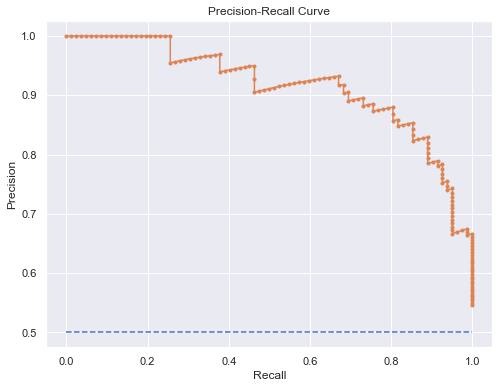

In [222]:
# Precision Recall Curve 
plt.figure(figsize=(8, 6))
pred_ytest_rf = BestRFC.predict(xtest)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(ytest, probs) # calculate precision-recall curve
f1 = f1_score(ytest, pred_ytest_rf)                                    # calculate F1 score
auc_rf_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(ytest, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_rf_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [223]:
models.append('Random Forest')
model_accuracy.append(accuracy_score(ytest, pred_ytest_rf))
model_f1.append(f1)
model_auc.append(auc_dt)

## Support Vector Machine

In [224]:
from sklearn.svm import SVC  
SVM = SVC(kernel = 'rbf')

In [225]:
SVM.fit(xtrain,ytrain)

SVC()

In [226]:
print("Accuracy Score for Training Dataset : ",SVM.score(xtrain,ytrain))
print("Accuracy Score for test Dataset : ",SVM.score(xtest,ytest))

Accuracy Score for Training Dataset :  0.8058823529411765
Accuracy Score for test Dataset :  0.7666666666666667


### Now we will optimise the performance using GridSearchCV

In [227]:
parameters = {
    'C':[1, 5, 10, 15, 20, 25,30,35,40,45,50,55,60,65],
    'gamma':[0.001, 0.005, 0.0001, 0.00001,0.000001]
}

In [228]:
GridSVM = GridSearchCV(estimator=SVM,param_grid=parameters,cv = 5,verbose=0)
GridSVM.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60,
                               65],
                         'gamma': [0.001, 0.005, 0.0001, 1e-05, 1e-06]})

In [229]:
print('Best Parameters : ',GridSVM.best_params_)
print('Best Accuracy Score : ',GridSVM.best_score_)

Best Parameters :  {'C': 5, 'gamma': 0.005}
Best Accuracy Score :  0.731


In [230]:
BestSVM = SVC(kernel='rbf', C=5, gamma=0.005, probability=True)

In [231]:
BestSVM.fit(xtrain,ytrain)
print("Accuracy Score for Training Dataset : ",BestSVM.score(xtrain,ytrain))
print("Accuracy Score for test Dataset : ",BestSVM.score(xtest,ytest))

Accuracy Score for Training Dataset :  0.7282352941176471
Accuracy Score for test Dataset :  0.7666666666666667


### Plotting the ROC curve

AUC: 0.868


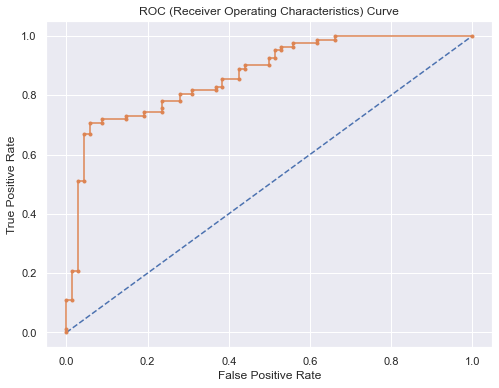

In [232]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
plt.figure(figsize=(8,6))
probs = BestSVM.predict_proba(xtest)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_svm = roc_auc_score(ytest, probs)           # calculate AUC
print('AUC: %.3f' %auc_svm)
fpr, tpr, thresholds = roc_curve(ytest, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");


### Plotting the Precision Recall

f1=0.783 auc_pr=0.884 ap=0.885


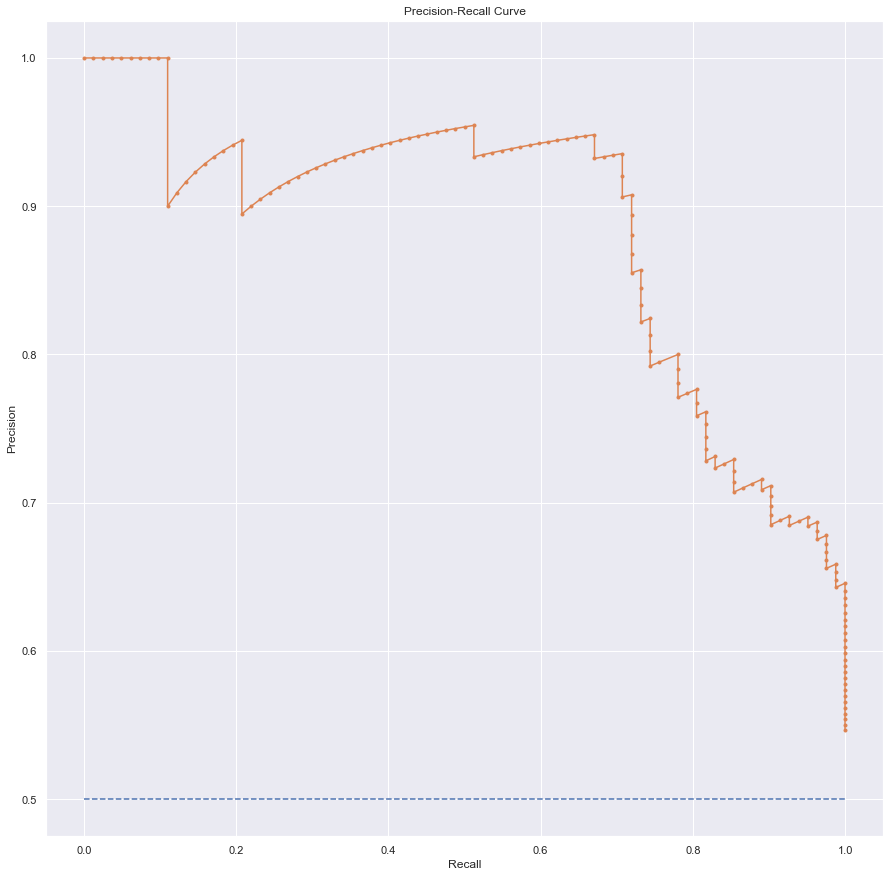

In [233]:
# Precision Recall Curve 

pred_ytest_svm = BestSVM.predict(xtest)                                    # predict class values
precision, recall, thresholds = precision_recall_curve(ytest, probs) # calculate precision-recall curve
f1 = f1_score(ytest, pred_ytest_svm)                                    # calculate F1 score
auc_svm_pr = auc(recall, precision)                                   # calculate precision-recall AUC
ap = average_precision_score(ytest, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_svm_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [234]:
models.append('SVM')
model_accuracy.append(accuracy_score(ytest, pred_ytest_svm))
model_f1.append(f1)
model_auc.append(auc_svm)

## K-Nearest Neighbor (KNN) Classification

In [235]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)

In [236]:
KNN.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [237]:
print("Accuracy Score for Training Dataset : ",KNN.score(xtrain,ytrain))
print("Accuracy Score for test Dataset : ",KNN.score(xtest,ytest))

Accuracy Score for Training Dataset :  0.8611764705882353
Accuracy Score for test Dataset :  0.74


### Now we will optimise it using the GridsearchCV

In [238]:
knn_neighbors = [i for i in range(2,16)]
parameters = {
    'n_neighbors': knn_neighbors
}

In [239]:
GridKNN = GridSearchCV(estimator=KNN,param_grid=parameters,cv = 5,verbose=0)
GridKNN.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [240]:
print('Best Parameters : ',GridKNN.best_params_)
print('Best Accuracy Score : ',GridKNN.best_score_)

Best Parameters :  {'n_neighbors': 15}
Best Accuracy Score :  0.758


In [241]:
BestKNN = KNeighborsClassifier(n_neighbors=15)

In [242]:
BestKNN.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=15)

In [243]:
print("Accuracy Score for Training Dataset : ",BestKNN.score(xtrain,ytrain))
print("Accuracy Score for test Dataset : ",BestKNN.score(xtest,ytest))

Accuracy Score for Training Dataset :  0.78
Accuracy Score for test Dataset :  0.7333333333333333


## Plotting the ROC curve

AUC: 0.844


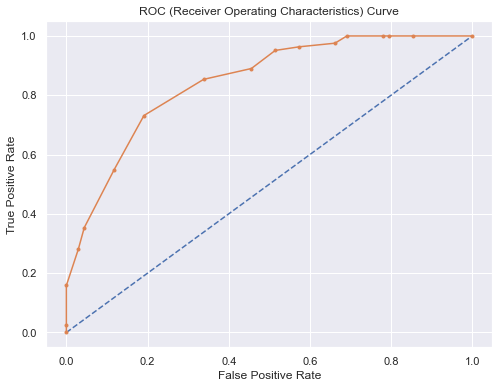

In [244]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
plt.figure(figsize=(8,6))
probs = BestKNN.predict_proba(xtest)              # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_knn = roc_auc_score(ytest, probs)           # calculate AUC
print('AUC: %.3f' %auc_knn)
fpr, tpr, thresholds = roc_curve(ytest, probs)  # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

## Plotting the Precision Recall

f1=0.785 auc_pr=0.863 ap=0.844


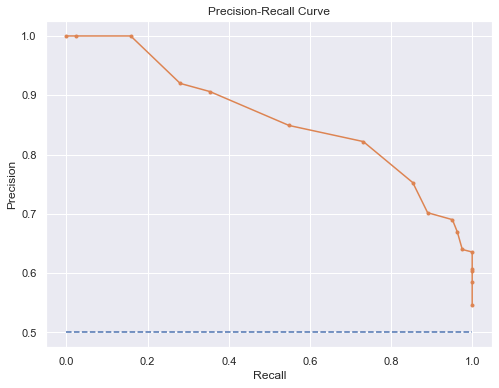

In [245]:
# Precision Recall Curve 
plt.figure(figsize=(8,6))
pred_ytest_knn = BestKNN.predict(xtest)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(ytest, probs) # calculate precision-recall curve
f1 = f1_score(ytest, pred_ytest_knn)                                    # calculate F1 score
auc_knn_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(ytest, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_knn_pr, ap))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

### Adding the result in the dataset

In [246]:
models.append('KNN')
model_accuracy.append(accuracy_score(ytest, pred_ytest_knn))
model_f1.append(f1)
model_auc.append(auc_knn)

## Now we will check the best performing Model

In [249]:
model_summary = pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc), columns = ['model','accuracy','f1_score','auc'])
model_summary = model_summary.set_index('model')

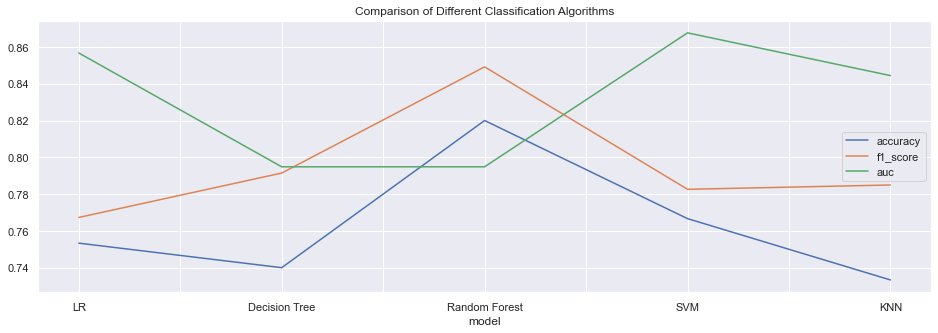

In [251]:
model_summary.plot(figsize=(16,5))
plt.title("Comparison of Different Classification Algorithms");

In [250]:
model_summary

,accuracy,f1_score,auc
model,,,
LR,0.753333,0.767296,0.856707
Decision Tree,0.740000,0.791444,0.794835
Random Forest,0.820000,0.849162,0.794835
SVM,0.766667,0.782609,0.867647
KNN,0.733333,0.784946,0.844423


### Among all models, RandomForest has given best accuracy and f1_score. Therefore we will build final model using RandomForest.

### FINAL CLASSIFIER:

In [253]:
final_model = BestRFC

## Data Modeling:

**(1) Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used:**

First we will print the Classification report

In [254]:
cr = classification_report(ytest, final_model.predict(xtest))
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.69      0.78        68
           1       0.78      0.93      0.85        82

    accuracy                           0.82       150
   macro avg       0.84      0.81      0.81       150
weighted avg       0.83      0.82      0.82       150



In [255]:
confusion = confusion_matrix(ytest, final_model.predict(xtest))
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[47 21]
 [ 6 76]]


In [260]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('True Positve :',TP)
print('True Negative :',TN)
print('False Positive :',FP)
print('False Negative :',FN)

True Positve : 76
True Negative : 47
False Positive : 21
False Negative : 6


**Sensitivity and Specificity:**

Ideally we want to maximize both Sensitivity & Specificity. But this is not possible always. There is always a trade-off. Sometimes we want to be 100% sure on Predicted negatives, sometimes we want to be 100% sure on Predicted positives. Sometimes we simply don’t want to compromise on sensitivity sometimes we don’t want to compromise on specificity.

The **Sensitivity** will help us address the issue of **False Negative**. There might be some cases where the model predicted negative but it was supposed to be Positive. We need minimize False negetives as this may be Fatal for the person. To handle it, we will find the Sensitivity which tells us the percentage of the prediction which were correctly identified as Positive. 
                          
                          Sensitivity = TruePositive/(TruePositive+FalseNegative)


In [263]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = TP/(TP+FP)
Sensitivity = TP/(TP+FN)                     # also called recall
Specificity = TN/(TN+FP)

print("Accuracy: %.3f"%Accuracy)
print("Precision: %.3f"%Precision)
print("Sensitivity: %.3f"%Sensitivity)
print("Specificity: %.3f"%Specificity)
print("AUC: %.3f"%auc_rf)

Accuracy: 0.820
Precision: 0.784
Sensitivity: 0.927
Specificity: 0.691
AUC: 0.903


## `Selected model is best suited for diabetes prediction as it is having more sensitivity which is of utmost importance as per our problem statement. we don't want diabetic people to be falsly classified as non-diabetic as this may be fatal for them.`

# Data Reporting:

## Tabluea Public Link for Diabetes Prediction Vizualization & Dashboard :

https://public.tableau.com/app/profile/nipun.gupta3604/viz/DiabetesAnalysisDashboard_16602222811040/Dashboard1#1